# Loan Default Prediction Project

We Solve this Project in 6 Phase

 1. Bussiness Understanding
 2. Data Understanding
 3. Data Preparation
 4. Modeling
 5. Evaluation
 6. Deployment

# 1. Bussiness Understanding

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.


Lending Club is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. Lending Club operates an online lending platform that enables borrowers to obtain a loan, and investors to purchase notes backed by payments made on loans. Lending Club is the world's largest peer-to-peer lending platform.  Lending Club enables borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee. 


Problem Statement: To classify if the borrower will default the loan using borrower’s finance history. That means, given a set of new predictor variables, we need to predict the target variable as 1 -> Defaulter or 0 -> Non-Defaulter. The metric we use to choose the best model is ‘False Negative Rate’. (predictor and target variables explained later) 

### Import Nessecerry Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings    #remove warning messege in our project file
warnings.filterwarnings('ignore')
from IPython.core.display import HTML    #for good look display we import html display
from sklearn.preprocessing import StandardScaler   #Convert data into Standard Scale
from sklearn.model_selection import train_test_split     #for split data into tranning dataset and testing dataset
from sklearn.feature_selection import RFE     #Feature selection using Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression   #Logistic Regresssion Algrothim
from sklearn.ensemble import RandomForestClassifier  #Random Forest Classifer Algrothim
from sklearn.metrics import confusion_matrix,classification_report  #for Confussion matrix and classification report
from sklearn.tree import DecisionTreeClassifier   #Decision Tree Classifier Algrothims
from sklearn.neighbors import KNeighborsClassifier   #KNN(K Near Neghbors Algrothims)

#  2. Data Understanding Phase Start.

In [2]:
#first data set
loan_2012_2013 = pd.read_csv("2012-2013.csv")

In [3]:
#second data set
loan_2014 = pd.read_csv('2014loan.csv')



In [4]:
#Check the type of data set.

print(type(loan_2012_2013),type(loan_2014))

#Check the shape of data set.
print((loan_2012_2013).shape,(loan_2014).shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(235633, 145) (188185, 145)


### Check First Data Set and Collect Information About it

In [5]:
#check Head of our Data frame
loan_2012_2013.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,9600.0,9600.0,9600.0,36 months,13.66%,326.53,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,7650.0,7650.0,7650.0,36 months,13.66%,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12800.0,12800.0,12800.0,60 months,17.14%,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_2012_2013.describe(include='all')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,2,0.0,235629.000000,235629.000000,235629.000000,235629,235629,235629.000000,235629,235629,...,503.000000,503.000000,235629,235629,4238,4238,4238,4238.000000,4238.000000,4238.000000
unique,2,NaN,NaN,NaN,NaN,2,89,NaN,7,35,...,NaN,NaN,1,2,54,3,56,NaN,NaN,NaN
top,Total amount funded in policy code 1: 3503840175,NaN,NaN,NaN,NaN,36 months,12.99%,NaN,C,C2,...,NaN,NaN,Cash,N,Jun-18,COMPLETE,Apr-17,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,162570,12630,NaN,66565,13965,...,NaN,NaN,235629,231391,213,2716,226,NaN,NaN,NaN
mean,NaN,NaN,14870.156793,14870.156793,14865.334169,NaN,NaN,442.454925,NaN,NaN,...,8091.385924,192.951451,NaN,NaN,NaN,NaN,NaN,4484.115722,46.905694,9.413639
std,NaN,NaN,8438.318193,8438.318193,8435.524995,NaN,NaN,245.041761,NaN,NaN,...,4599.277400,149.437673,NaN,NaN,NaN,NaN,NaN,3286.816378,10.081704,8.539733
min,NaN,NaN,1000.000000,1000.000000,950.000000,NaN,NaN,23.360000,NaN,NaN,...,174.150000,0.040000,NaN,NaN,NaN,NaN,NaN,44.210000,0.550000,0.000000
25%,NaN,NaN,8325.000000,8325.000000,8325.000000,NaN,NaN,265.680000,NaN,NaN,...,4796.580000,81.080000,NaN,NaN,NaN,NaN,NaN,2047.202500,45.000000,1.000000
50%,NaN,NaN,13000.000000,13000.000000,13000.000000,NaN,NaN,384.060000,NaN,NaN,...,7451.380000,164.550000,NaN,NaN,NaN,NaN,NaN,3779.015000,45.000000,9.000000
75%,NaN,NaN,20000.000000,20000.000000,20000.000000,NaN,NaN,578.690000,NaN,NaN,...,11214.030000,274.100000,NaN,NaN,NaN,NaN,NaN,6069.500000,50.000000,16.000000


### Check Missing Values in Our first Data set 

In [7]:
#check missing values in first data set
print(loan_2012_2013.isnull().sum())

id                                            235631
member_id                                     235633
loan_amnt                                          4
funded_amnt                                        4
funded_amnt_inv                                    4
term                                               4
int_rate                                           4
installment                                        4
grade                                              4
sub_grade                                          4
emp_title                                      13240
emp_length                                     12023
home_ownership                                     4
annual_inc                                         4
verification_status                                4
issue_d                                            4
loan_status                                        4
pymnt_plan                                         4
url                                           

In [8]:
print('Rows in Data set', loan_2012_2013.shape[0],'Columns in Data set ', loan_2012_2013.shape[1])

Rows in Data set 235633 Columns in Data set  145


## Check Second Data set

In [9]:
loan_2014.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.62%,373.94,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,27050.0,27050.0,27050.0,36 months,10.99%,885.46,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,11.99%,398.52,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,28000.0,28000.0,28000.0,36 months,7.62%,872.52,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,36 months,10.99%,392.81,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
loan_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188185 entries, 0 to 188184
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 208.2+ MB


In [11]:
loan_2014.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,188181.000000,188181.00000,188181.000000,188181.000000,1.881810e+05,0.0,188181.000000,188181.000000,188181.000000,...,80.0,80.000000,80.0,80.000000,69.000000,80.000000,80.000000,2051.000000,2051.000000,2051.000000
mean,NaN,14354.139366,14351.61985,14339.619132,443.733006,7.223328e+04,NaN,17.060171,0.239626,0.803678,...,3.0,96.949250,3.0,13.525000,291.816957,6291.665375,170.367250,4198.310127,45.854120,5.163335
std,NaN,8114.766207,8112.60861,8107.012285,242.648831,5.182459e+04,NaN,7.597634,0.703730,1.032934,...,0.0,47.126236,0.0,9.637709,129.078105,2846.971967,178.320313,3148.095618,9.208698,7.875937
min,NaN,1000.000000,1000.00000,950.000000,4.930000,4.800000e+03,NaN,0.000000,0.000000,0.000000,...,3.0,30.220000,3.0,0.000000,90.660000,2221.640000,0.130000,121.910000,0.200000,0.000000
25%,NaN,8000.000000,8000.00000,8000.000000,269.980000,4.500000e+04,NaN,11.340000,0.000000,0.000000,...,3.0,62.205000,3.0,1.500000,195.840000,4252.005000,72.635000,1922.995000,40.250000,0.000000
50%,NaN,12175.000000,12125.00000,12100.000000,398.210000,6.200000e+04,NaN,16.780000,0.000000,0.000000,...,3.0,85.100000,3.0,15.000000,263.670000,5704.460000,113.405000,3470.140000,45.000000,0.000000
75%,NaN,20000.000000,20000.00000,19975.000000,578.310000,8.700000e+04,NaN,22.580000,0.000000,1.000000,...,3.0,137.685000,3.0,21.000000,417.420000,8253.697500,217.380000,5628.005000,50.000000,10.000000
max,NaN,35000.000000,35000.00000,35000.000000,1408.130000,7.141778e+06,NaN,34.990000,29.000000,8.000000,...,3.0,247.400000,3.0,29.000000,531.720000,15761.170000,991.790000,33601.000000,184.360000,36.000000


### check Missing Values in Second Data Set  

In [12]:
loan_2014.isnull().sum()

id                                            188183
member_id                                     188185
loan_amnt                                          4
funded_amnt                                        4
funded_amnt_inv                                    4
term                                               4
int_rate                                           4
installment                                        4
grade                                              4
sub_grade                                          4
emp_title                                      11741
emp_length                                      7891
home_ownership                                     4
annual_inc                                         4
verification_status                                4
issue_d                                            4
loan_status                                        4
pymnt_plan                                         4
url                                           

In [13]:
loan_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188185 entries, 0 to 188184
Columns: 145 entries, id to settlement_term
dtypes: float64(108), object(37)
memory usage: 208.2+ MB


#  3. Data Prepration 

### Concatenation Above Two DataSet and Create a New DataFrame is Called loandataset 

In [14]:
loandataset = pd.concat([loan_2012_2013, loan_2014])

In [15]:
loandataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,9600.0,9600.0,9600.0,36 months,13.66%,326.53,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,7650.0,7650.0,7650.0,36 months,13.66%,260.20,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12800.0,12800.0,12800.0,60 months,17.14%,319.08,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### Now Check Shape of loandataset 

In [16]:
print('Rows in Data set', loandataset.shape[0],'Columns in Data set ', loandataset.shape[1])

Rows in Data set 423818 Columns in Data set  145


## Missing value Treatment

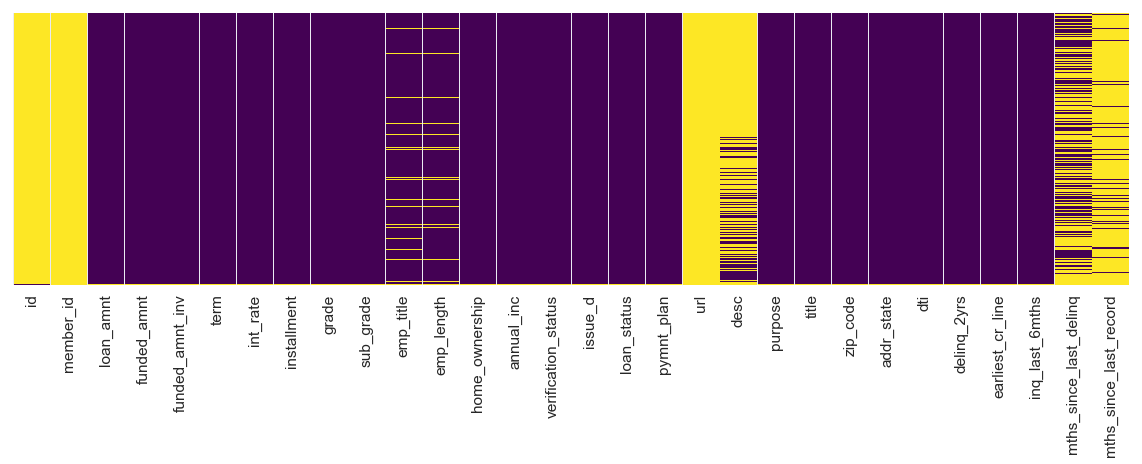

In [19]:
sns.set(font_scale=1.4)
plt.figure(figsize=(20,5))
sns.heatmap(loandataset.iloc[:,:30].isnull(),yticklabels=False,cbar=False,cmap='viridis')

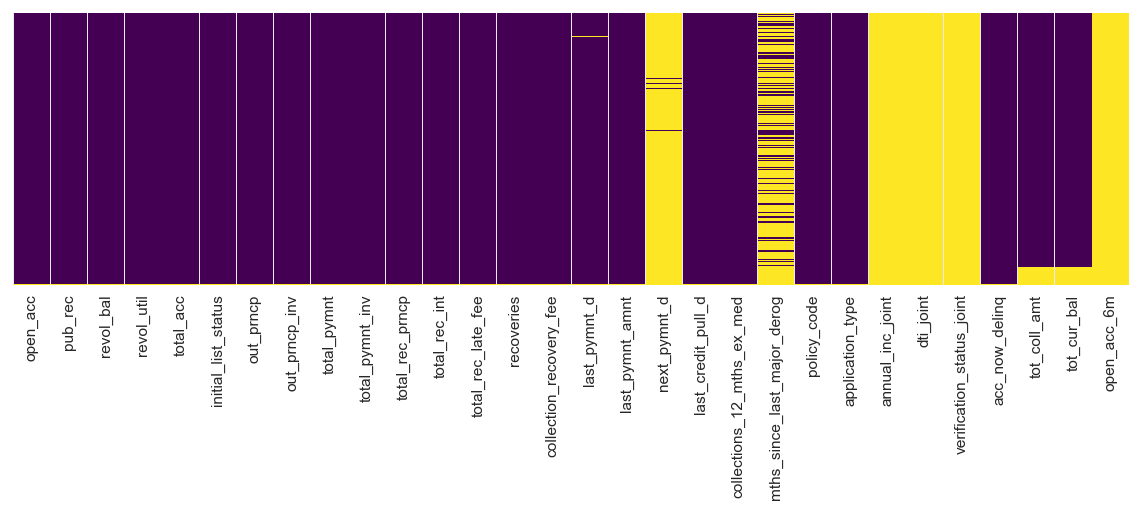

In [20]:
sns.set(font_scale=1.4)
plt.figure(figsize=(20,5))
sns.heatmap(loandataset.iloc[:,30:60].isnull(),yticklabels=False,cbar=False,cmap='viridis')

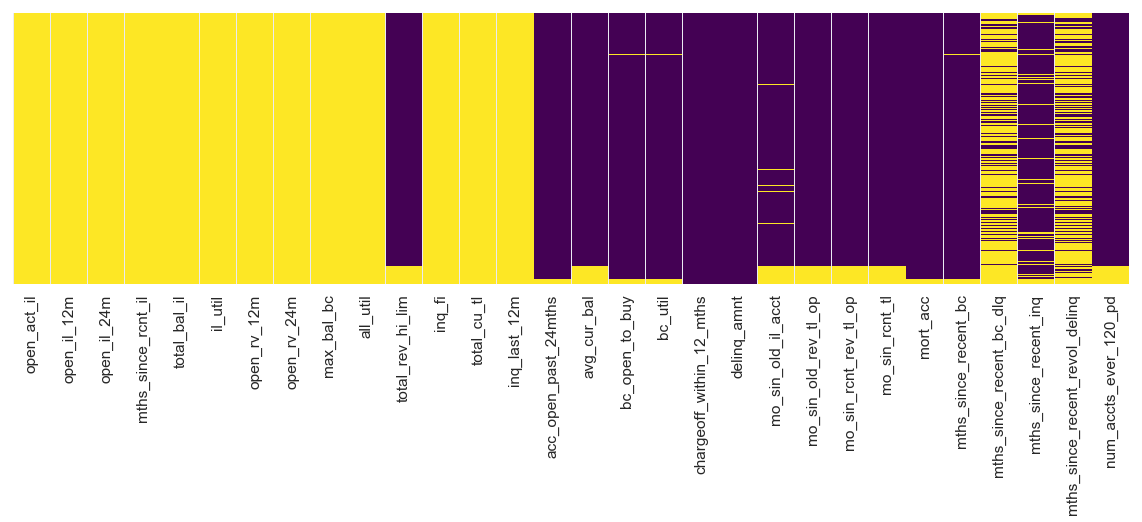

In [21]:
sns.set(font_scale=1.4)
plt.figure(figsize=(20,5))
sns.heatmap(loandataset.iloc[:,60:90].isnull(),yticklabels=False,cbar=False,cmap='viridis')

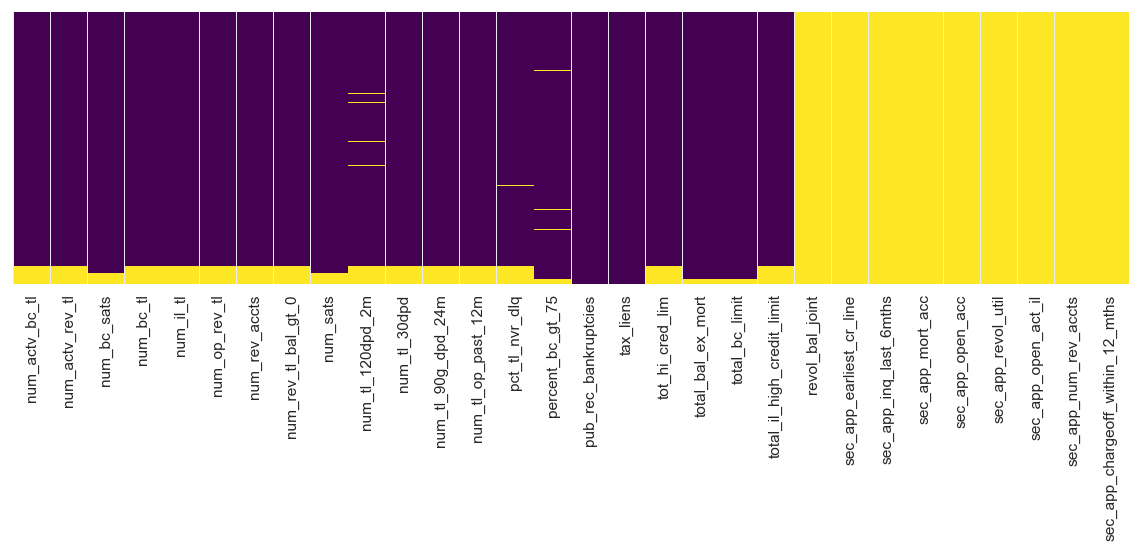

In [22]:
sns.set(font_scale=1.4)
plt.figure(figsize=(20,5))
sns.heatmap(loandataset.iloc[:,90:120].isnull(),yticklabels=False,cbar=False,cmap='viridis')

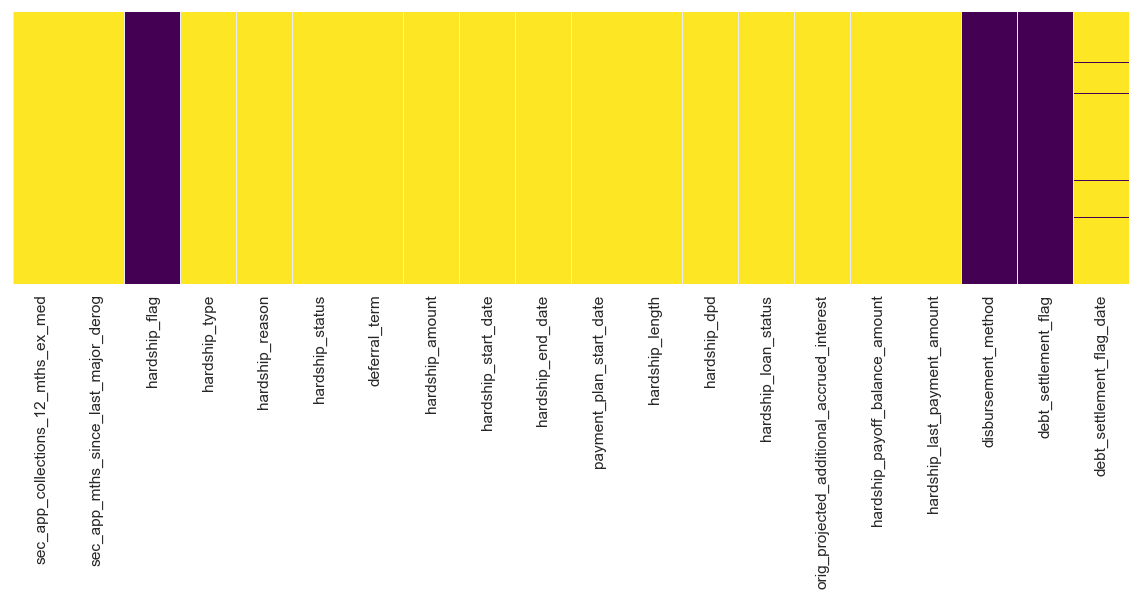

In [23]:
sns.set(font_scale=1.4)
plt.figure(figsize=(20,5))
sns.heatmap(loandataset.iloc[:,120:140].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
loandataset.isnull().sum()

id                                            423814
member_id                                     423818
loan_amnt                                          8
funded_amnt                                        8
funded_amnt_inv                                    8
term                                               8
int_rate                                           8
installment                                        8
grade                                              8
sub_grade                                          8
emp_title                                      24981
emp_length                                     19914
home_ownership                                     8
annual_inc                                         8
verification_status                                8
issue_d                                            8
loan_status                                        8
pymnt_plan                                         8
url                                           

## Now Drop Empty Columns in loandataset  

In [25]:
loandatasetnew=loandataset.dropna(axis=1,thresh=len(loandataset)*0.9) 

In [26]:
loandatasetnew.shape
loandataset = loandatasetnew

### Check Head Again of loandataset

In [27]:
loandataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,...,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N
1,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,...,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N
2,9600.0,9600.0,9600.0,36 months,13.66%,326.53,C,C3,Admin Specialist,10+ years,...,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,N,Cash,N
3,7650.0,7650.0,7650.0,36 months,13.66%,260.20,C,C3,Technical Specialist,< 1 year,...,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,N,Cash,N
4,12800.0,12800.0,12800.0,60 months,17.14%,319.08,D,D4,Senior Sales Professional,10+ years,...,100.0,0.0,0.0,368700.0,18007.0,4400.0,18000.0,N,Cash,N


In [28]:
loandataset['purpose'].unique()

array(['credit_card', 'debt_consolidation', 'car', 'home_improvement',
       'house', 'other', 'medical', 'moving', 'major_purchase',
       'vacation', 'small_business', 'renewable_energy', 'wedding', nan],
      dtype=object)

# What is target column in loandataset ?

'loan_status' 

### Now We Check Some Information About 'loan_status' column

In [29]:
loandataset['loan_status'].head(10)

0    Charged Off
1     Fully Paid
2     Fully Paid
3    Charged Off
4        Current
5     Fully Paid
6     Fully Paid
7    Charged Off
8     Fully Paid
9    Charged Off
Name: loan_status, dtype: object

##### Check How many Unique Values in 'loan_status' column
 

In [30]:
loandataset['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan],
      dtype=object)

######  Here are 8 Type of Unique Values but we target only two type of values 
1. 'Fully Paid'
2. 'Charged off'


##### We Convert Our Column values into 
'Fully Paid' == 0

'Charged off' == 1

and create a new dataset is called Dataset_withBoolTarget 

In [31]:
data_with_loanstatus_sliced = loandataset[(loandataset['loan_status']=="Fully Paid") | (loandataset['loan_status']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"loan_status": di})

In [32]:
Dataset_withBoolTarget['loan_status'].head(10)

0     1
1     0
2     0
3     1
5     0
6     0
7     1
8     0
9     1
10    0
Name: loan_status, dtype: int64

##### Now Count How many Number of fully paid and charged off values 

In [33]:
print(Dataset_withBoolTarget['loan_status'].value_counts())
print('\n')
print("Current shape of dataset :",Dataset_withBoolTarget.shape)
Dataset_withBoolTarget.head(3)

0    340444
1     70829
Name: loan_status, dtype: int64


Current shape of dataset : (411273, 86)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,10400.0,10400.0,10400.0,36 months,6.99%,321.08,A,A3,Truck Driver Delivery Personel,8 years,...,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,N,Cash,N
1,15000.0,15000.0,15000.0,60 months,12.39%,336.64,C,C1,MANAGEMENT,10+ years,...,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,N,Cash,N
2,9600.0,9600.0,9600.0,36 months,13.66%,326.53,C,C3,Admin Specialist,10+ years,...,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,N,Cash,N


##### Check Missing Values in Dataset_withBoolTarget 

In [34]:
Dataset_withBoolTarget.isnull().sum()


loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     24493
emp_length                    19441
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
title                             7
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                  

### Check Corr-relation between each columns in Dataset

In [35]:
Dataset_withBoolTarget.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999912,0.999850,0.953286,0.384623,0.056539,0.032390,0.000793,-0.003977,0.193112,...,-0.018648,-0.026372,0.101392,0.008776,-0.127749,0.002373,0.350878,0.286444,0.389792,0.192941
funded_amnt,0.999912,1.000000,0.999942,0.953389,0.384622,0.056501,0.032404,0.000813,-0.004000,0.193141,...,-0.018654,-0.026382,0.101392,0.008785,-0.127722,0.002388,0.350875,0.286435,0.389814,0.192927
funded_amnt_inv,0.999850,0.999942,1.000000,0.953344,0.384613,0.056489,0.032488,0.000894,-0.003859,0.193218,...,-0.018653,-0.026291,0.101354,0.008801,-0.127635,0.002403,0.350861,0.286473,0.389765,0.192960
installment,0.953286,0.953389,0.953344,1.000000,0.382278,0.031345,0.025119,0.011001,0.018172,0.184589,...,-0.012762,-0.007897,0.082462,0.028564,-0.120651,0.009168,0.318237,0.270638,0.360707,0.177745
annual_inc,0.384623,0.384622,0.384613,0.382278,1.000000,-0.052086,-0.204622,0.061392,0.065667,0.156492,...,0.017524,0.050829,-0.013486,-0.033755,-0.066363,0.041618,0.503196,0.384416,0.309208,0.309467
loan_status,0.056539,0.056501,0.056489,0.031345,-0.052086,1.000000,0.091895,0.011207,0.055162,0.026077,...,0.005070,0.079750,-0.000538,0.068173,0.010141,0.001691,-0.064449,-0.006529,-0.065691,-0.005019
dti,0.032390,0.032404,0.032488,0.025119,-0.204622,0.091895,1.000000,-0.010501,0.000681,0.289561,...,-0.025075,0.101200,0.096551,0.171757,-0.052163,-0.027934,-0.005966,0.292168,0.033600,0.328954
delinq_2yrs,0.000793,0.000813,0.000894,0.011001,0.061392,0.011207,-0.010501,1.000000,0.023884,0.056559,...,0.635113,-0.036812,-0.449012,-0.015195,-0.041813,0.013614,0.076167,0.035051,-0.069115,0.068141
inq_last_6mths,-0.003977,-0.004000,-0.003859,0.018172,0.065667,0.055162,0.000681,0.023884,1.000000,0.107225,...,0.024356,0.266257,-0.037047,-0.082837,0.051499,0.007553,0.062129,0.058426,-0.013023,0.074842
open_acc,0.193112,0.193141,0.193218,0.184589,0.156492,0.026077,0.289561,0.056559,0.107225,1.000000,...,0.010750,0.319258,0.110128,-0.101468,-0.054915,-0.003677,0.274521,0.404392,0.320255,0.367452


In [36]:
type(Dataset_withBoolTarget.corr())

pandas.core.frame.DataFrame

In [37]:
Dataset_withBoolTarget_corr=Dataset_withBoolTarget.corr()

### Here We Drop Some More Unrelvent Values in DataSet 

In [38]:
s=Dataset_withBoolTarget_corr.loc['loan_status',:]
list_week_relation_pos=s[(s <0.1) & (s> 0)] 
list_week_relation_neg=s[(s > -0.1) & (s < 0)]  

list_ps=list(list_week_relation_pos.index)
list_ng=list(list_week_relation_neg.index)
list_column_to_drop=list_ps+list_ng
print(len(list_column_to_drop))

#Dataset_withBoolTarget.drop(list_column_to_drop,axis=1,inplace=True)
print(Dataset_withBoolTarget.shape)

print(Dataset_withBoolTarget.head(5))

52
(411273, 86)
   loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0    10400.0      10400.0          10400.0   36 months    6.99%       321.08   
1    15000.0      15000.0          15000.0   60 months   12.39%       336.64   
2     9600.0       9600.0           9600.0   36 months   13.66%       326.53   
3     7650.0       7650.0           7650.0   36 months   13.66%       260.20   
5    21425.0      21425.0          21425.0   60 months   15.59%       516.36   

  grade sub_grade                        emp_title emp_length  \
0     A        A3   Truck Driver Delivery Personel    8 years   
1     C        C1                       MANAGEMENT  10+ years   
2     C        C3                 Admin Specialist  10+ years   
3     C        C3             Technical Specialist   < 1 year   
5     D        D1  Programming Analysis Supervisor    6 years   

          ...          percent_bc_gt_75  pub_rec_bankruptcies tax_liens  \
0         ...                      14

In [39]:
Dataset_withBoolTarget.info()
# we can see there are many categorical column where we should apply our domain knowledge and if any looks not important we should drop it .
col_to_drop=['zip_code','title','grade','application_type','policy_code','addr_state','earliest_cr_line','sub_grade','issue_d','pymnt_plan','last_pymnt_d']
print(col_to_drop)
#Dataset_withBoolTarget.drop(list_column_to_drop,axis=1,inplace=True)
print(Dataset_withBoolTarget.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 188180
Data columns (total 86 columns):
loan_amnt                     411273 non-null float64
funded_amnt                   411273 non-null float64
funded_amnt_inv               411273 non-null float64
term                          411273 non-null object
int_rate                      411273 non-null object
installment                   411273 non-null float64
grade                         411273 non-null object
sub_grade                     411273 non-null object
emp_title                     386780 non-null object
emp_length                    391832 non-null object
home_ownership                411273 non-null object
annual_inc                    411273 non-null float64
verification_status           411273 non-null object
issue_d                       411273 non-null object
loan_status                   411273 non-null int64
pymnt_plan                    411273 non-null object
purpose                       411273 

### Here we Create our Final DataFrame is called 'Final_data' 

In [40]:
features = ['int_rate','grade','emp_length','home_ownership','loan_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','purpose'] 
Final_data = Dataset_withBoolTarget[features] #19 features with target var


In [41]:
Final_data.head(10)

,int_rate,grade,emp_length,home_ownership,loan_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,purpose
0,6.99%,A,8 years,MORTGAGE,1,0.0,0.0,6611.69,6611.69,5217.75,0.0,521.27,93.8286,321.08,credit_card
1,12.39%,C,10+ years,RENT,0,0.0,0.0,17392.37,17392.37,15000.00,0.0,0.00,0.0000,12017.81,debt_consolidation
2,13.66%,C,10+ years,RENT,0,0.0,0.0,9973.43,9973.43,9600.00,0.0,0.00,0.0000,9338.58,debt_consolidation
3,13.66%,C,< 1 year,RENT,1,0.0,0.0,2281.98,2281.98,704.38,0.0,1237.99,222.8382,17.70,debt_consolidation
5,15.59%,D,6 years,RENT,0,0.0,0.0,25512.20,25512.20,21425.00,0.0,0.00,0.0000,17813.19,credit_card
6,13.66%,C,10+ years,MORTGAGE,0,0.0,0.0,19562.31,19562.31,17000.00,0.0,0.00,0.0000,10888.01,debt_consolidation
7,14.31%,C,10+ years,RENT,1,0.0,0.0,13907.79,13907.79,7301.23,0.0,3544.92,638.0856,800.71,credit_card
8,11.99%,B,< 1 year,MORTGAGE,0,0.0,0.0,2622.22,2622.22,2500.00,0.0,0.00,0.0000,2294.26,home_improvement
9,17.86%,D,10+ years,RENT,1,0.0,0.0,5746.89,5746.89,2628.14,0.0,1515.55,272.7990,50.00,house
10,11.44%,B,2 years,RENT,0,0.0,0.0,5431.68,5431.68,5250.00,0.0,0.00,0.0000,43.40,debt_consolidation


In [42]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411273 entries, 0 to 188180
Data columns (total 15 columns):
int_rate                   411273 non-null object
grade                      411273 non-null object
emp_length                 391832 non-null object
home_ownership             411273 non-null object
loan_status                411273 non-null int64
out_prncp                  411273 non-null float64
out_prncp_inv              411273 non-null float64
total_pymnt                411273 non-null float64
total_pymnt_inv            411273 non-null float64
total_rec_prncp            411273 non-null float64
total_rec_late_fee         411273 non-null float64
recoveries                 411273 non-null float64
collection_recovery_fee    411273 non-null float64
last_pymnt_amnt            411273 non-null float64
purpose                    411273 non-null object
dtypes: float64(9), int64(1), object(5)
memory usage: 50.2+ MB


## Data Transformation
Here we do some transformation in 4 Columns of Object Type

How we transformation in these columns ?
1. 'grade' = ['A', 'B', 'D', 'C', 'E', 'F', 'G'] to [7,6,5,4,3,2,1]
2. 'home_ownership' = ['MORTGAGE', 'OWN', 'RENT', 'NONE', 'OTHER', 'ANY'] to [6,5,4,3,2,1]
3. 'emp_length' = ['3 years', '10+ years', '5 years', '4 years', '6 years', '1 year','2 years', '7 years', '9 years', '8 years', '< 1 year', 'n/a']  to [int], remove string values , n/a and change type to int
4. 'int_rate' = remove % sign and change to int

In [43]:
Final_data['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [44]:
Final_data['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [45]:
Final_data['emp_length'].unique()

array(['8 years', '10+ years', '< 1 year', '6 years', '2 years',
       '7 years', '9 years', nan, '4 years', '5 years', '3 years',
       '1 year'], dtype=object)

In [46]:
#Final_data['int_rate'].unique()

In [47]:
Final_data["int_rate"] = Final_data["int_rate"].apply(lambda x:float(x[:-1]) ) #reomving % sign, conv to float  - int_rate column
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)


Current shape of dataset : (411273, 15)


In [48]:
#Data encoding
Final_data['grade'] = Final_data['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Final_data["home_ownership"] = Final_data["home_ownership"].map({"MORTGAGE":6,"RENT":5,"OWN":4,"OTHER":3,"NONE":2,"ANY":1})
Final_data["emp_length"] = Final_data["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0'}, regex = True)
#Final_data["emp_length"] = Final_data["emp_length"].apply(lambda x:int(x))
print("Current shape of dataset :",Final_data.shape)
Final_data.head()

Current shape of dataset : (411273, 15)


,int_rate,grade,emp_length,home_ownership,loan_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,purpose
0,6.99,7,8,6,1,0.0,0.0,6611.69,6611.69,5217.75,0.0,521.27,93.8286,321.08,credit_card
1,12.39,5,10,5,0,0.0,0.0,17392.37,17392.37,15000.00,0.0,0.00,0.0000,12017.81,debt_consolidation
2,13.66,5,10,5,0,0.0,0.0,9973.43,9973.43,9600.00,0.0,0.00,0.0000,9338.58,debt_consolidation
3,13.66,5,1,5,1,0.0,0.0,2281.98,2281.98,704.38,0.0,1237.99,222.8382,17.70,debt_consolidation
4,15.59,4,6,5,0,0.0,0.0,25512.20,25512.20,21425.00,0.0,0.00,0.0000,17813.19,credit_card


# Exploratory Data Analysis 

Text(0.5, 0, 'loan_status')

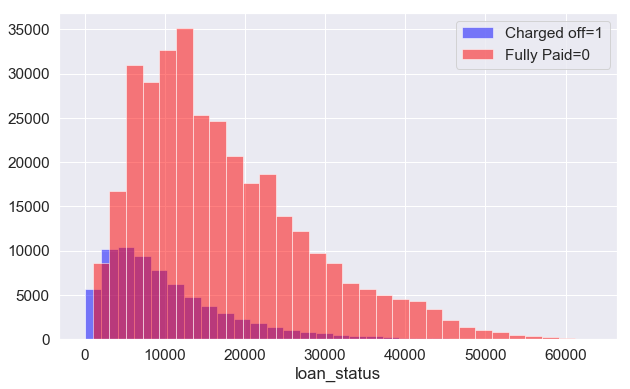

In [49]:
plt.figure(figsize=(10,6))
Final_data[Final_data['loan_status']==1]['total_pymnt'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Charged off=1')
Final_data[Final_data['loan_status']==0]['total_pymnt'].hist(alpha=0.5,color='red',
                                              bins=30,label='Fully Paid=0')
plt.legend()
plt.xlabel('loan_status')

### Check Numbers of Fully Paid and Charged off Customers

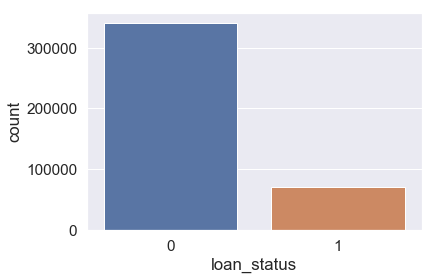

In [50]:
sns.countplot(x='loan_status',data=Final_data)

### Here We Check Purpose of Loan By Visualization Graph

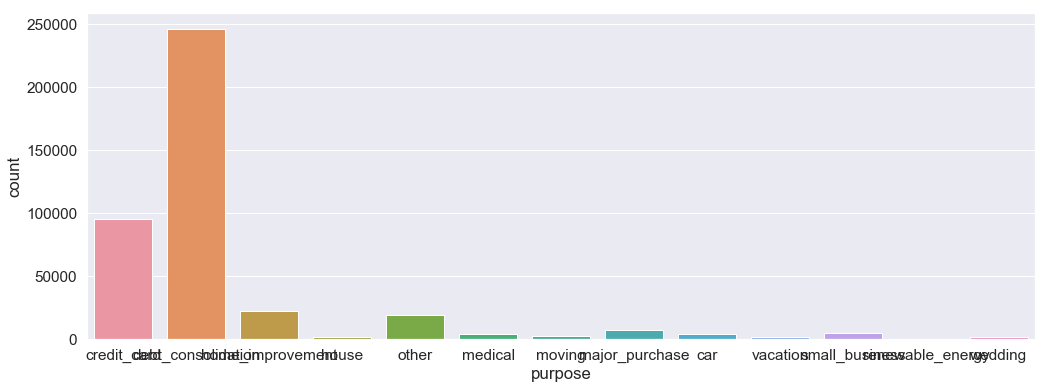

In [51]:
plt.figure(figsize=(17,6))
sns.countplot(x='purpose',data=Final_data)

In Above 'purpose' Columns have 13 Unique Values and we see 'debt_consolidation' type value are 246500 it means 246500 people get loan 

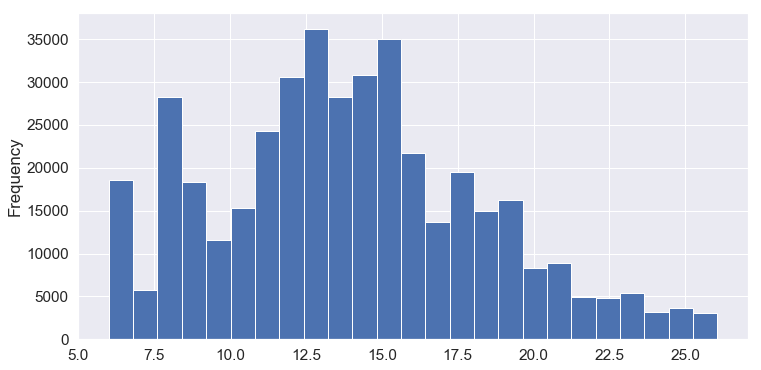

In [52]:
plt.figure(figsize=(12,6))
Final_data['int_rate'].plot(kind='hist',bins=25)

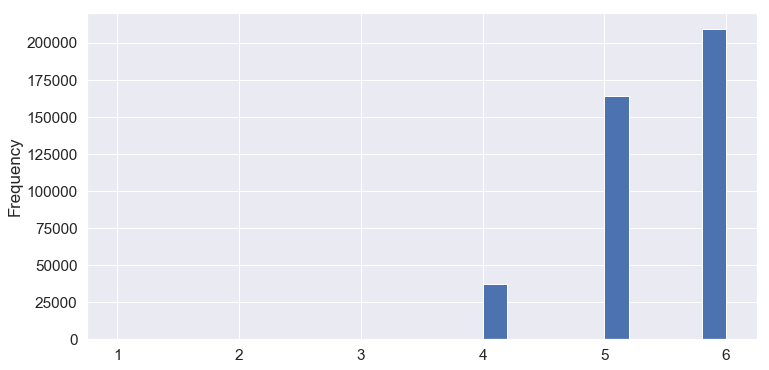

In [53]:
plt.figure(figsize=(12,6))
Final_data['home_ownership'].plot(kind='hist',bins=25)

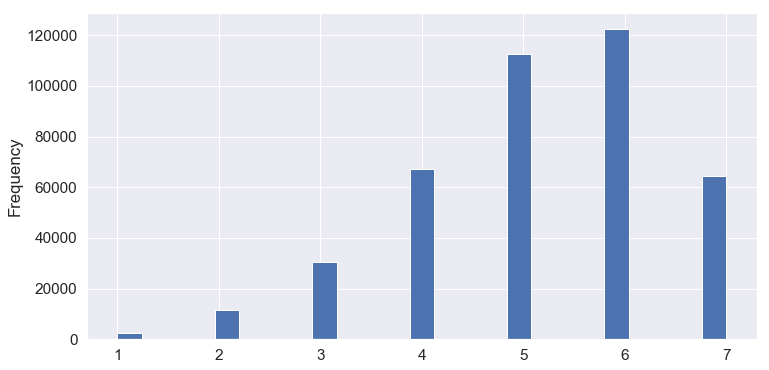

In [54]:
plt.figure(figsize=(12,6))
Final_data['grade'].plot(kind='hist',bins=25)

In [55]:
#just drop Purpose column because its a object type column and we don't use object type columns when convert Standard Scale
Final_data1 = Final_data.drop('purpose',axis=1)

###  In Final_data set all values are int or float type that's good for our project Now we check missing values again and fill all the missing values and create a clean data set 

# Convert Dataset to Standard scale datset

In [56]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler() #instance of preprocessing

fields = Final_data1.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(Final_data1[fields]), columns = fields)
data_clean['loan_status'] = Final_data['loan_status']
data_clean['loan_status'].value_counts()

0    340444
1     70829
Name: loan_status, dtype: int64

In [57]:
data_clean.head()

,int_rate,grade,emp_length,home_ownership,loan_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee
0,-1.583486,1.387048,0.525409,0.890293,1,0.0,0.0,-0.894979,-0.894590,-0.893914,-0.136275,0.323278,0.402154
1,-0.353294,-0.146201,1.098239,-0.640718,0,0.0,0.0,0.120015,0.120906,0.267056,-0.136275,-0.244752,-0.214206
2,-0.063971,-0.146201,1.098239,-0.640718,0,0.0,0.0,-0.578473,-0.577928,-0.373823,-0.136275,-0.244752,-0.214206
3,-0.063971,-0.146201,-1.479499,-0.640718,1,0.0,0.0,-1.302618,-1.302431,-1.429566,-0.136275,1.104289,1.249619
4,0.375709,-0.912826,-0.047422,-0.640718,0,0.0,0.0,0.884492,0.885761,1.029583,-0.136275,-0.244752,-0.214206


In [58]:
loanstatus_0 = data_clean[data_clean["loan_status"]==0]
loanstatus_1 = data_clean[data_clean["loan_status"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)
data_clean.head()

Current shape of dataset : (11000, 13)


,int_rate,grade,emp_length,home_ownership,loan_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee
0,-1.086853,0.620423,0.811824,0.890293,0,0.0,0.0,-0.869170,-0.868769,-0.801076,-0.136275,-0.244752,-0.214206
1,0.008930,-0.146201,-0.906668,-0.640718,1,0.0,0.0,-1.067052,-1.066749,-1.231463,-0.136275,1.245123,1.402435
2,-0.672232,0.620423,NaN,-2.171730,0,0.0,0.0,-1.089215,-1.088922,-1.014702,-0.136275,-0.244752,-0.214206
3,-0.414803,0.620423,-1.479499,0.890293,1,0.0,0.0,-0.098237,-0.097455,-0.671400,3.591087,3.191125,-0.007278
4,-0.216606,0.620423,1.098239,0.890293,1,0.0,0.0,-0.414949,-0.414323,-0.573846,-0.136275,0.271430,0.345895


### Drop Three More Column Becaues it's all null values

In [59]:
dropC=['emp_length','out_prncp','out_prncp_inv']                    
data_clean.drop(dropC,axis=1,inplace=True)

###  After Standarizie Values we see a clean a Standard scale data set and this DataSet is Ready fo Trainning and Testing for Our Model. 

## In this Part of Our Project we see Correlation Between all column to each other 

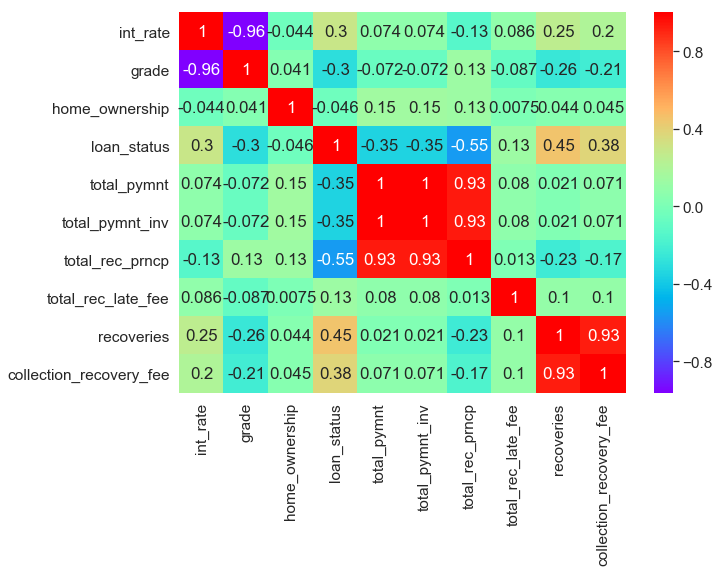

In [60]:
plt.figure(figsize=(10,7))
sns.heatmap(data_clean.corr(),cmap='rainbow',annot=True)

In [61]:
data_clean.corr() 

,int_rate,grade,home_ownership,loan_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_late_fee,recoveries,collection_recovery_fee
int_rate,1.000000,-0.961391,-0.043993,0.299542,0.073778,0.073905,-0.134408,0.085605,0.250435,0.202340
grade,-0.961391,1.000000,0.041244,-0.295598,-0.072225,-0.072383,0.132996,-0.087236,-0.255886,-0.214009
home_ownership,-0.043993,0.041244,1.000000,-0.045991,0.147710,0.147731,0.133631,0.007461,0.043995,0.044607
loan_status,0.299542,-0.295598,-0.045991,1.000000,-0.353276,-0.353293,-0.549325,0.129446,0.448574,0.382421
total_pymnt,0.073778,-0.072225,0.147710,-0.353276,1.000000,0.999994,0.934086,0.080424,0.021010,0.071325
total_pymnt_inv,0.073905,-0.072383,0.147731,-0.353293,0.999994,1.000000,0.934073,0.080445,0.020963,0.071282
total_rec_prncp,-0.134408,0.132996,0.133631,-0.549325,0.934086,0.934073,1.000000,0.012766,-0.230355,-0.165405
total_rec_late_fee,0.085605,-0.087236,0.007461,0.129446,0.080424,0.080445,0.012766,1.000000,0.101357,0.100666
recoveries,0.250435,-0.255886,0.043995,0.448574,0.021010,0.020963,-0.230355,0.101357,1.000000,0.929935
collection_recovery_fee,0.202340,-0.214009,0.044607,0.382421,0.071325,0.071282,-0.165405,0.100666,0.929935,1.000000


# 4. Model Creation 

## Train test split

In [62]:
from sklearn.model_selection import train_test_split

#### Divide DataSet into Training and Testing DataSet  

In [63]:
data_clean.head()
#print(data_clean.isnull().sum())
data_clean['loan_status_New']=data_clean['loan_status']
data_clean.head(2)
data_clean.drop('loan_status',axis=1,inplace=True)

###  Now we create a two different variable First X variable hold all column without target  and y varable hold our target column 

In [64]:
X = data_clean.iloc[:,:-1]
y = data_clean.iloc[:,-1]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Evalulate Different Models and Find Best Accuracy in Models
Here is a List of Differnet type of Algrothims we use
1. Random Forest Classifer
2. Decision Tree
3. Logistic Regression Classifer
4. K Near Neighbors 

## Train DataSet Using  Random Forest model


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(n_estimators=600)  #create instance


In [68]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Evaluation of Random Forest Model

In [69]:
prediction = rfc.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [71]:
rfc_report = classification_report(y_test,prediction)
print(rfc_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1710
           1       0.99      0.95      0.97      1590

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



In [72]:
print(confusion_matrix(y_test,prediction))

[[1699   11]
 [  80 1510]]


In [73]:
print(confusion_matrix(y_test,prediction))

print(accuracy_score(y_test, prediction, normalize=True))

[[1699   11]
 [  80 1510]]
0.9724242424242424


## Train DataSet Using Decision Tree Algrothim


In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtree = DecisionTreeClassifier()

In [76]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Evaluation of Decision Tree Model

In [77]:
prediction = dtree.predict(X_test)

In [78]:
#Confusion matrix and classification report
dtree_report=classification_report(y_test,prediction)
print(dtree_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1710
           1       0.98      0.96      0.97      1590

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



In [79]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test, prediction, normalize=True))

[[1671   39]
 [  63 1527]]
0.9690909090909091


## Train DataSet Using Logistic Regression Algrothim

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression()

In [82]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Evalution of Logistic Regression Model

In [83]:
prediction = lr.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, classification_report


In [85]:
print(confusion_matrix(y_test,prediction))

[[1633   77]
 [ 118 1472]]


In [86]:
lreport=(classification_report(y_test,prediction))
print(lreport)
print(accuracy_score(y_test, prediction, normalize=True))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1710
           1       0.95      0.93      0.94      1590

   micro avg       0.94      0.94      0.94      3300
   macro avg       0.94      0.94      0.94      3300
weighted avg       0.94      0.94      0.94      3300

0.9409090909090909


## Train DataSet Using  KNN Algrothim

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn = KNeighborsClassifier(n_neighbors=1)

In [89]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### Evalution of KNN Model

In [90]:
pred = knn.predict(X_test)

In [91]:
print(confusion_matrix(y_test,pred))

[[1575  135]
 [ 173 1417]]


In [92]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1710
           1       0.91      0.89      0.90      1590

   micro avg       0.91      0.91      0.91      3300
   macro avg       0.91      0.91      0.91      3300
weighted avg       0.91      0.91      0.91      3300



## Choosing a K Value and so Create Model Again for Better Accuracy Rate
### Here We Work with loop and Check K Values 1 to 40 and Chosses a Value where maxium values 

In [93]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

###  Chosses a K Value According to Graph 

Text(0, 0.5, 'Error Rate')

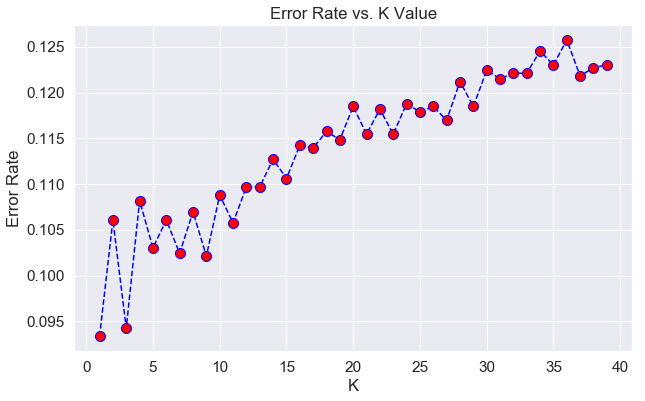

In [94]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Retrain with new K Value

In [95]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=34)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=34')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
knnreport=(classification_report(y_test,pred))
print(knnreport)

WITH K=34


[[1580  130]
 [ 281 1309]]


              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1710
           1       0.91      0.82      0.86      1590

   micro avg       0.88      0.88      0.88      3300
   macro avg       0.88      0.87      0.87      3300
weighted avg       0.88      0.88      0.87      3300



## Here we Check Classification Report for all above Models and Check Who's Model Give us Best Accuracy Score. 

In [96]:
print("________________Random Forest Classification Report__________________\n")
print('RFC',rfc_report)
print('**********************************************************************\n')
print("________________Decision Tree Classification Report__________________\n")
print('DTree',dtree_report)
print('**********************************************************************\n')
print("________________Logistic Regression Classification Report__________________\n")
print('llogtt',lreport)
print('**********************************************************************\n')
print("________________K Nearest Neighbor Classification Report__________________\n")
print('knnreport',knnreport)

________________Random Forest Classification Report__________________

RFC               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1710
           1       0.99      0.95      0.97      1590

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300

**********************************************************************

________________Decision Tree Classification Report__________________

DTree               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1710
           1       0.98      0.96      0.97      1590

   micro avg       0.97      0.97      0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300

**********************************************************************

________________Logistic Regression Classification

# Conclusion  

### We Check all of these Model Result and than we getb Random Forest Model have a Best Accuracy other than and it's also have a Better Classification Report. So,We can say that  'The random forest model is best for our dataset'.